In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression








In [2]:
calhouse = pd.read_csv('cal_housingdata.csv')
calhouse.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200


In [3]:


X = calhouse[["medianIncome", "households", "totalBedrooms"]]
y = calhouse["medianHouseValue"].values.reshape(-1, 1)
print(X.shape, y.shape)
A=X
b=y
X

(20640, 3) (20640, 1)


,medianIncome,households,totalBedrooms
0,8.3252,126,129
1,8.3014,1138,1106
2,7.2574,177,190
3,5.6431,219,235
4,3.8462,259,280
5,4.0368,193,213
6,3.6591,514,489
7,3.1200,647,687
8,2.0804,595,665
9,3.6912,714,707


# Multiple Linear Regression

Multiple Linear Regression simply means that you have more than one feature variable.

For the Housing Price example, you may have features like this:

$Y_i$ = $Bias_0$ + $Weight_1$ sq_feet + $Weight_2$ num_bedrooms + $Weight_3$ num_bathrooms

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

The equation is often written as:

$Y_i = \theta_0 + \theta_1 X_{i1} + \theta_2 X_{i2} + \ldots + \theta_p X_{ip}$

Generate a linear dataset with 3 features

In [4]:
from sklearn.datasets import make_regression

#n_features = 3
#X, y = make_regression(n_samples=30, n_features=n_features, 
#                     n_informative=n_features, random_state=42, 
#                       noise=0.5, bias=100.0)

print(X.shape)
df = pd.DataFrame(data=X)
#del df['index']

print (df)


(20640, 3)
       medianIncome  households  totalBedrooms
0            8.3252         126            129
1            8.3014        1138           1106
2            7.2574         177            190
3            5.6431         219            235
4            3.8462         259            280
5            4.0368         193            213
6            3.6591         514            489
7            3.1200         647            687
8            2.0804         595            665
9            3.6912         714            707
10           3.2031         402            434
11           3.2705         734            752
12           3.0750         468            474
13           2.6736         174            191
14           1.9167         620            626
15           2.1250         264            283
16           2.7750         331            347
17           2.1202         303            293
18           1.9911         419            455
19           2.6033         275            298
20

In [5]:
#X=X.values


With 3 or more dimensions, it becomes harder to visualize the linear trends in our data

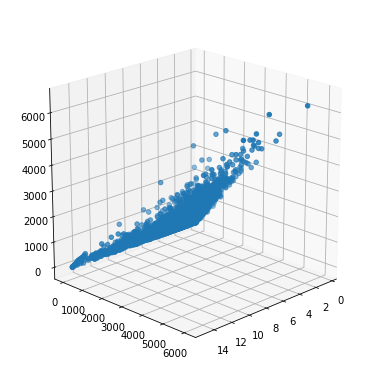

In [6]:
from mpl_toolkits.mplot3d import Axes3D
X=X.values
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X[:,0], X[:,1], X[:,2], cmap=plt.cm.get_cmap("Spectral"))
plt.show()

We can still visualize 3 features as a 3D plot, but what about n-dimensions? This becomes very difficult for the human brain to visualize. 

We could pick just one feature from X to fit our model, but what we really want it to find a line that best fits the data in n-dimensional space. To achieve this, Linear Regression can be solved using the analytical approach called [Ordinary Least Squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) or a computational approach [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) for estimating the parameters. Note that there are [tradeoffs](https://stats.stackexchange.com/questions/23128/solving-for-regression-parameters-in-closed-form-vs-gradient-descent) between using either approach. The Linear Regression model in Sklearn uses the Ordinary Least Squares method.

Luckily, we can just supply our n-dimensional features and sklearn will fit the model using all of our features.

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.4766872518822005


## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

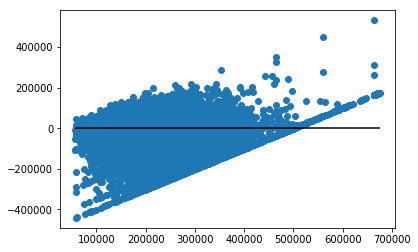

In [8]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [9]:
#We want our predictions to be close to zero on the y-axis in this plot.

In [10]:
#ELASTICNET ANALYSIS

In [13]:
#X, y = make_regression(n_features=2, random_state=0)
# A and b are same as X and y

regr = ElasticNet(random_state=0)

#n12 = np.squeeze(np.asarray(n2))

#X12 = np.squeeze(np.asarray(x1))

regr.fit(A, b)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
      
print(regr.coef_) 

print(regr.intercept_) 

#print(regr.predict([[0,0]])) 

[ 3.66306497e+04  2.74103211e+01 -9.17952591e+00]
[56315.72905293]
